# Intro
- [Garbage classification](https://www.kaggle.com/asdasdasasdas/garbage-classification)

# Analyze a File

In [1]:
import os 
import pathlib 
base = pathlib.Path('../data/Garbage classification')
classifications =  os.listdir(base)
print(classifications)

for classification in classifications:
    print(classification, len(os.listdir(base / classification)))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
cardboard 403
glass 501
metal 410
paper 594
plastic 482
trash 137


In [3]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')


<BarContainer object of 6 artists>

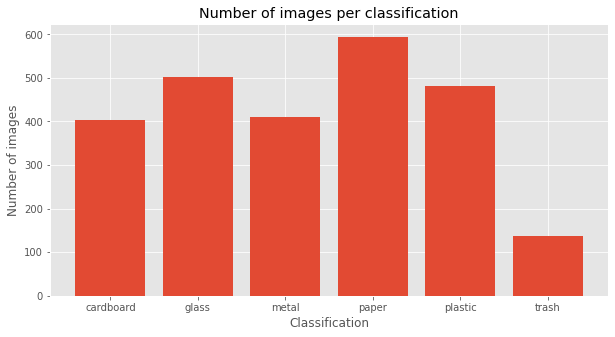

In [15]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xlabel('Classification')
plt.ylabel('Number of images')
plt.title('Distribution of Dataset')
plt.bar(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],[403, 501, 410, 594, 482, 137])

## Read an image

In [88]:
import PIL
print('Pillow version:', PIL.__version__)

Pillow version: 8.4.0


In [41]:
from PIL import Image 
image = Image.open(base / 'cardboard'/'cardboard403.jpg')

In [39]:
image.show()

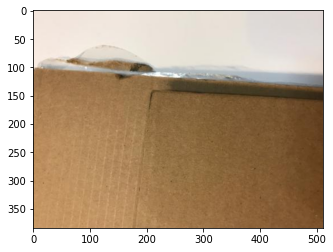

<class 'numpy.ndarray'>


In [44]:
from matplotlib import image 
image = image.imread(base / 'cardboard'/'cardboard403.jpg')
from matplotlib import pyplot as plt 
plt.imshow(image)
plt.show()
print(type(image))

## Create Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
import numpy as np

In [87]:
for classification in classifications:
    image_dir = np.array(os.listdir(base / classification))
    y_label = np.array([classification]*len(image_dir))
    X_train, X_test, _, _ = train_test_split(image_dir, y_label, test_size=0.3, random_state=42)
    print(f'{classification}: {len(image_dir)} = {len(X_train)} (train) + {len(X_test)} (test)')


cardboard: 403 = 282 (train) + 121 (test)
glass: 501 = 350 (train) + 151 (test)
metal: 410 = 287 (train) + 123 (test)
paper: 594 = 415 (train) + 179 (test)
plastic: 482 = 337 (train) + 145 (test)
trash: 137 = 95 (train) + 42 (test)


In [75]:
import shutil 
if not os.path.exists('../data/train'):
    os.mkdir('../data/train')
if not os.path.exists('../data/test'):
    os.mkdir('../data/test')
    
for classification in classifications:
    image_dir = np.array(os.listdir(base / classification))
    y_label = [classification]*len(image_dir)
    X_train, X_test, _, _ = train_test_split(image_dir, y_label, test_size=0.3, random_state=42)
    print(f'{classification}: {len(image_dir)} = {len(X_train)} (train) + {len(X_test)} (test)')
    print('moving files to trainning folder...')
    for img_file in X_train:
        shutil.copy(base/classification/img_file, pathlib.Path(f'../data/train/{img_file}'))
    
    
    print('moving files to testing folder...')
    for img_file in X_test:
        shutil.copy(base/classification/img_file, pathlib.Path(f'../data/test/{img_file}'))
    

cardboard: 403 = 282 (train) + 121 (test)
moving files to trainning folder...
moving files to testing folder...
glass: 501 = 350 (train) + 151 (test)
moving files to trainning folder...
moving files to testing folder...
metal: 410 = 287 (train) + 123 (test)
moving files to trainning folder...
moving files to testing folder...
paper: 594 = 415 (train) + 179 (test)
moving files to trainning folder...
moving files to testing folder...
plastic: 482 = 337 (train) + 145 (test)
moving files to trainning folder...
moving files to testing folder...
trash: 137 = 95 (train) + 42 (test)
moving files to trainning folder...
moving files to testing folder...


In [86]:
assert 121 == len(list(pathlib.Path('../data/test/').glob('cardboard*')))
assert 151 == len(list(pathlib.Path('../data/test/').glob('glass*')))
assert 123 == len(list(pathlib.Path('../data/test/').glob('metal*')))
assert 179 == len(list(pathlib.Path('../data/test/').glob('paper*')))
assert 145 == len(list(pathlib.Path('../data/test/').glob('plastic*')))
assert 42 == len(list(pathlib.Path('../data/test/').glob('trash*')))

assert 282 == len(list(pathlib.Path('../data/train/').glob('cardboard*')))
assert 350 == len(list(pathlib.Path('../data/train/').glob('glass*')))
assert 287 == len(list(pathlib.Path('../data/train/').glob('metal*')))
assert 415 == len(list(pathlib.Path('../data/train/').glob('paper*')))
assert 337 == len(list(pathlib.Path('../data/train/').glob('plastic*')))
assert 95 == len(list(pathlib.Path('../data/train/').glob('trash*')))
